## Import Statements

In [361]:
import pandas as pd
import numpy as np

## Data Exploration

**step1**: Read the .csv file and store it in a Pandas dataframe

In [362]:
df = pd.read_csv("QueryResults.csv")

**step2**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [363]:
df.head(5)
df.tail(5)

,m,TagName,Unnamed: 2
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**step3:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [364]:
df.shape

(1991, 3)

**step4**: Count the number of entries in each column of the dataframe

In [365]:
df.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

In [366]:
column_names= ['DATE','TAG','POSTS']
for i in range(len(df.columns)):
    df.rename(columns={df.columns[i]:column_names[i]}, inplace=True)
df    

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [367]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**step5**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [368]:
df.groupby(by='TAG').apply(lambda x:x.loc[:,'POSTS'].sum())

TAG
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**step6**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [374]:
df_= df.groupby(by=['TAG']).count()
df_.loc[:,'DATE'].idxmin() 


'go'

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [189]:
type(df['DATE'][1])

str

In [190]:
df.DATE = pd.to_datetime(df.DATE)

In [191]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


## Data Manipulation



In [204]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu'],
                        'Power': [100, 80, 25, 50, 99, 75, 5]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5


In [205]:
pivoted_df = test_df.pivot_table(index='Age',columns='Actor',values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75.0,99.0,5.0,NaN
Young,80.0,100.0,25.0,50.0


**Step7**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [209]:
reshaped_df=df.pivot(index='DATE',columns='TAG',values='POSTS')

In [210]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [211]:
reshaped_df.shape

(145, 14)

In [212]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [213]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [218]:
#column names:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Step8**: Count the number of entries per programming language. Why might the number of entries be different? 

In [230]:
reshaped_df.count(axis=0)   ##number of entries different due to nan values:

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [220]:
#filling na values with 0 posts:

reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [229]:
reshaped_df.isna().values.all()

False

## Data Visualisaton with with Matplotlib


**Step9**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [234]:
import matplotlib.pyplot as plt

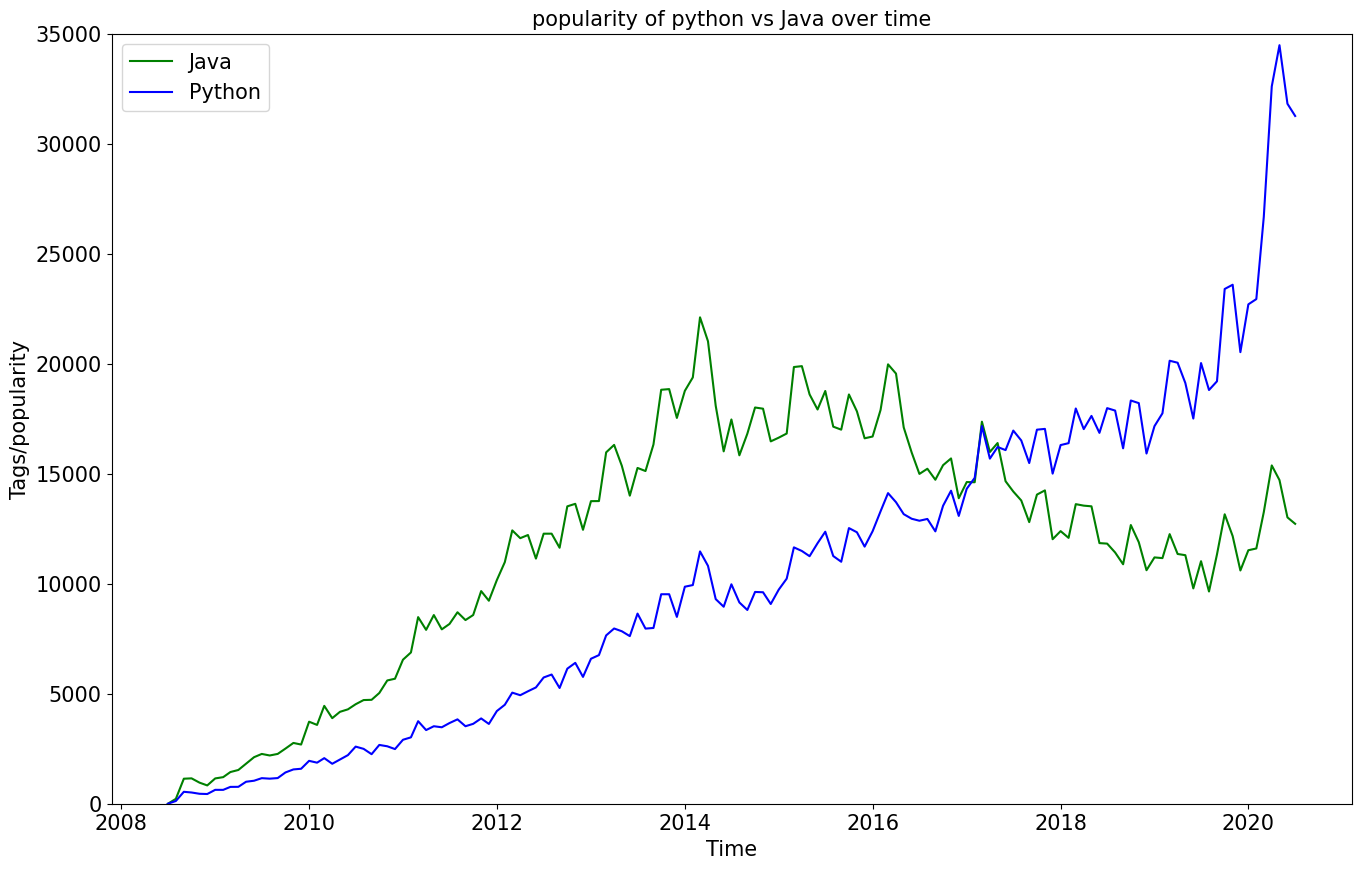

In [289]:
#For Java program:

y_java=reshaped_df.loc[:,'java']
x= reshaped_df.index
y_python = reshaped_df.loc[:,'python']

#resize the chart:
plt.figure(figsize=(16,10))
#as size is reshaped we need to resize the ticks:
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot(x,y_java, color='green', label='python')
plt.plot(x, y_python, color='blue', label='Java')
plt.title("popularity of python vs Java over time",fontsize=15)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Tags/popularity", fontsize=15)
plt.ylim(0,35000)
plt.legend(['Java','Python'], fontsize=15)

**Step10**: Show two line (e.g. for Java and Python) on the same chart.

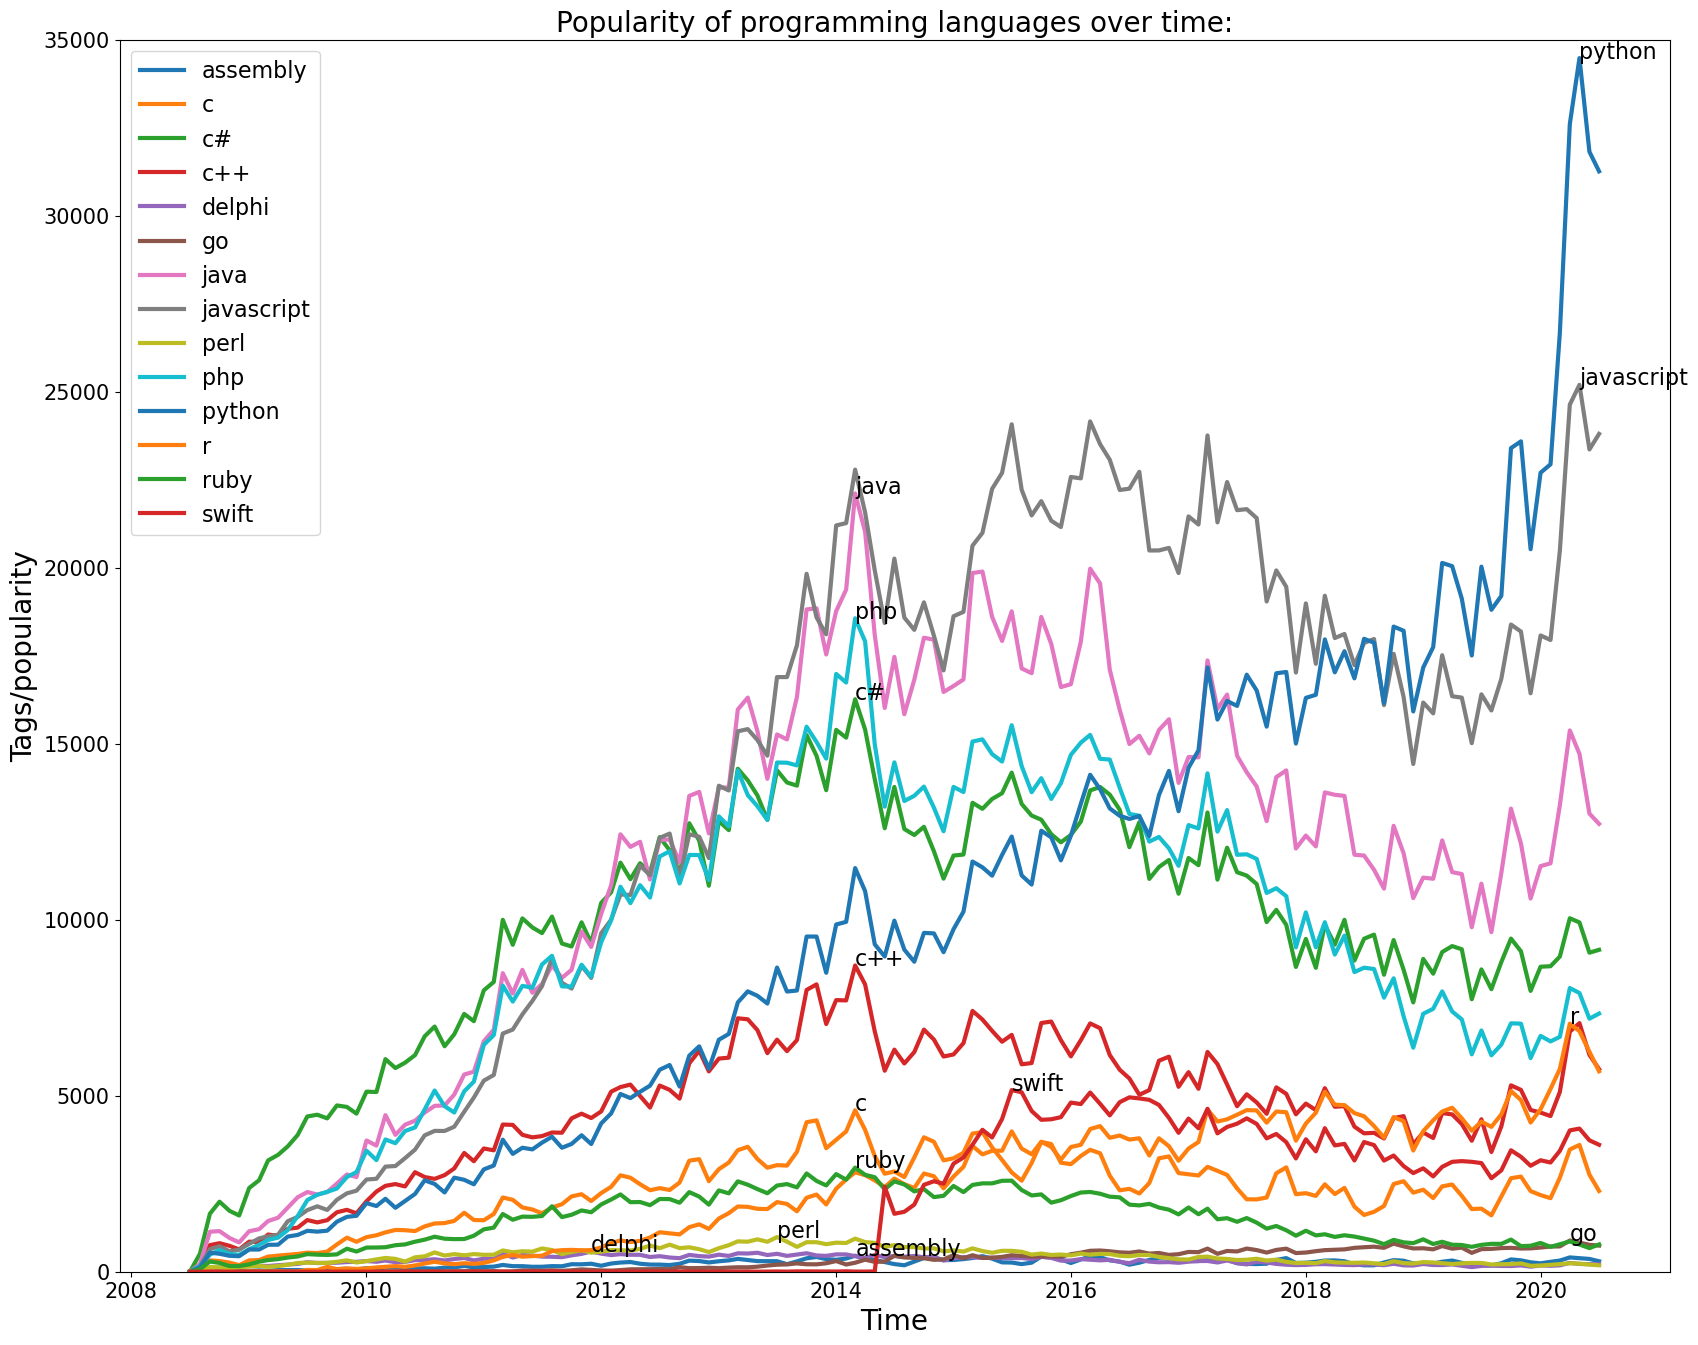

In [326]:
##Plotting for all programming languages:


plt.figure(figsize=(20,16))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,35000)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Tags/popularity', fontsize=20)
plt.title('Popularity of programming languages over time:', fontsize=20)


for e in reshaped_df.columns:
    plt.plot(x,reshaped_df[e], label=reshaped_df[e].name, linewidth=3)
    plt.annotate(reshaped_df[e].name, (reshaped_df[e].idxmax(), reshaped_df[e].max()), fontsize=16)
plt.legend(fontsize=16)    

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

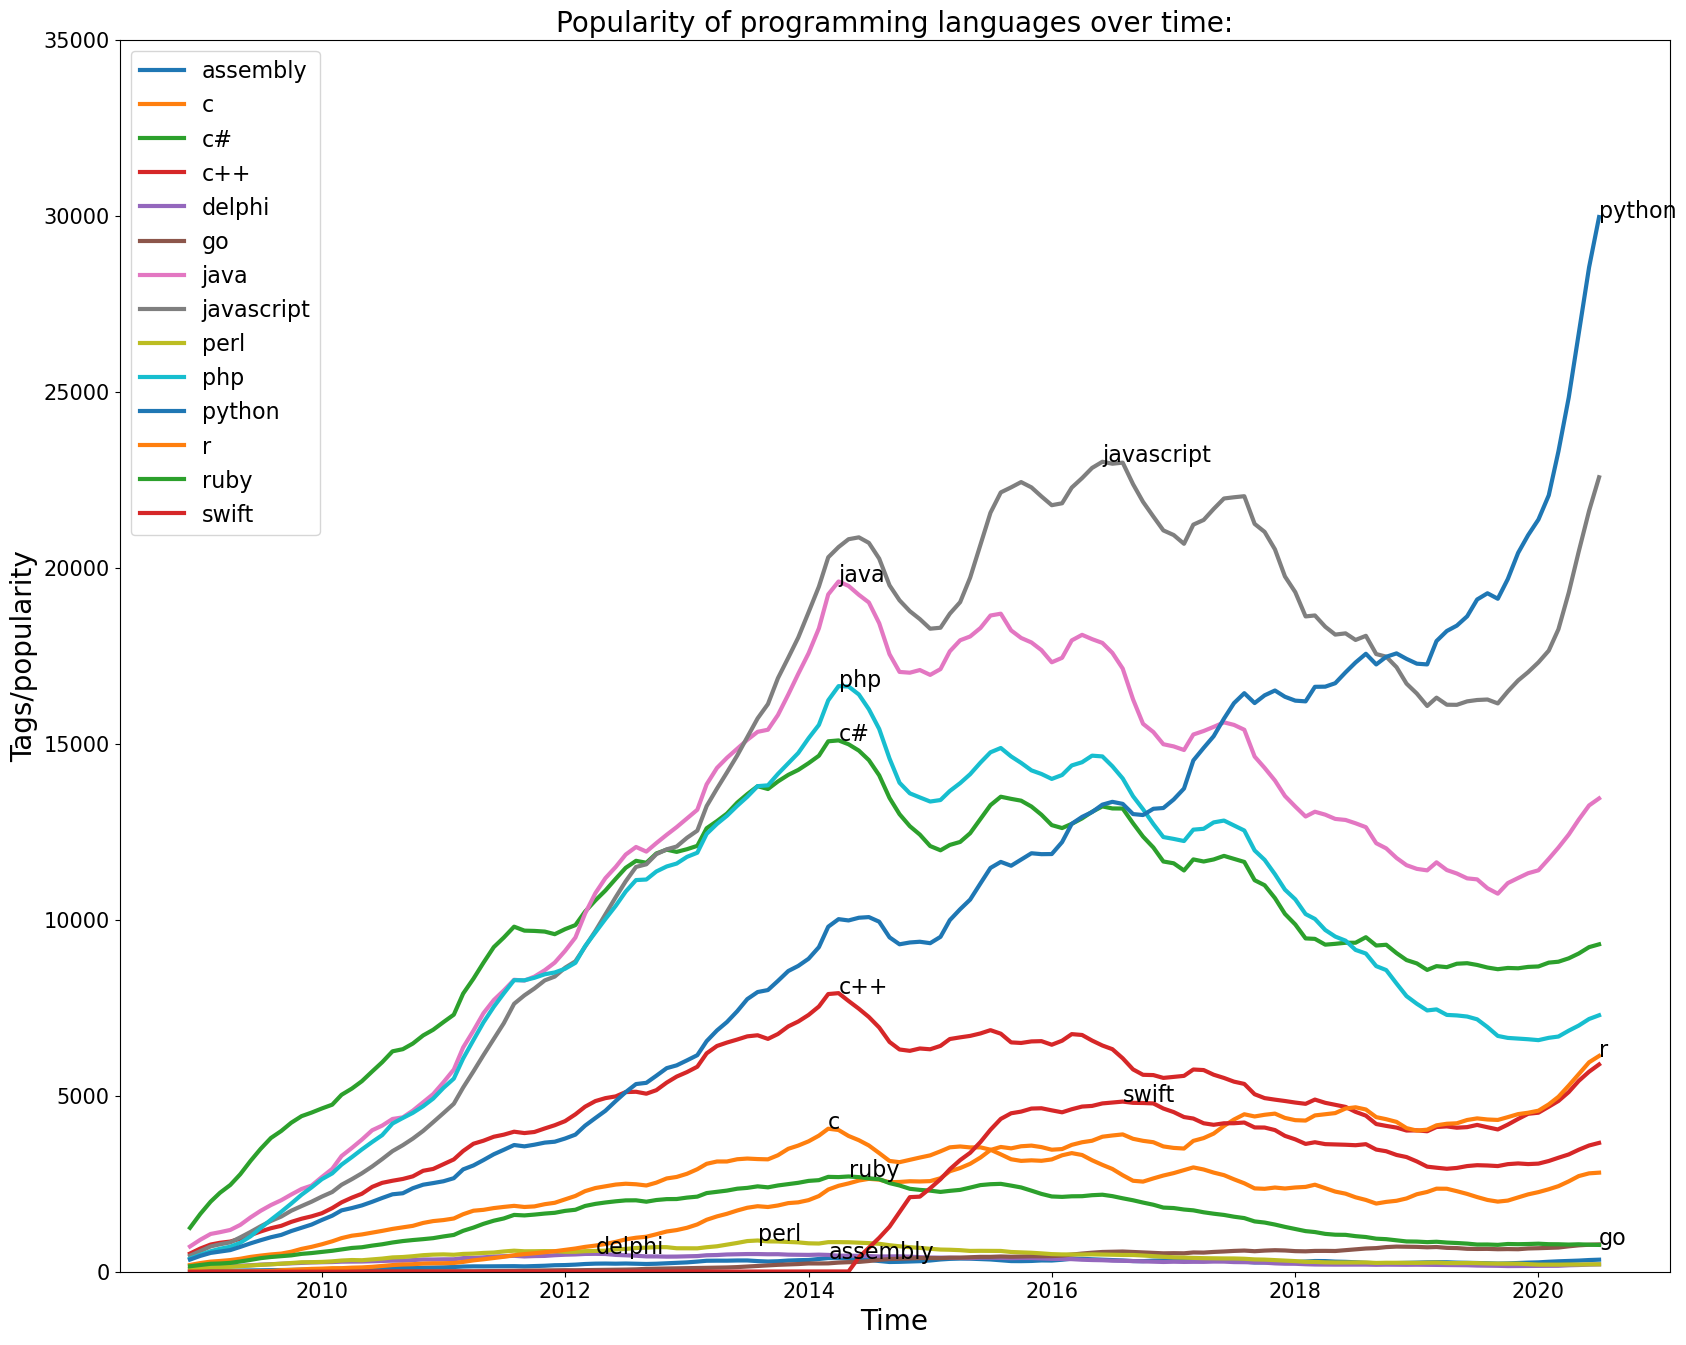

In [351]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(20,16))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,35000)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Tags/popularity', fontsize=20)
plt.title('Popularity of programming languages over time:', fontsize=20)


for e in roll_df.columns:
    plt.plot(x,roll_df[e], label=roll_df[e].name, linewidth=3)
    plt.annotate(roll_df[e].name, (roll_df[e].idxmax(), roll_df[e].max()), fontsize=16)
plt.legend(fontsize=16)  

In [356]:
df = pd.DataFrame({'B': [0, 1, 2, 9, 3, 6, 3, 2 ]})

In [358]:
df.rolling(3).mean()  #rolling mean is smoothing the function by taking into consideration other points lying nearby 
                      #rather than individual points which can give skipes or valleys.

,B
0,NaN
1,NaN
2,1.000000
3,4.000000
4,4.666667
5,6.000000
6,4.000000
7,3.666667


**Results:**

**Most popular programming language from 2008 to 2012: C#**

**Most popular programming language from 2015 to 2018: JavaScript**

**Most popular programming language in 2020: Python!!!!!!!!!!!!**